The bigbucket groundwater parameterization has been implemetned.

Goal is to test what kind of changes can be seen in the runoff compared to previous run without the lowest layer.

## Comparing runoff

In [62]:
import xarray as xr
import glob,os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from jupyterthemes import jtplot

jtplot.style(theme='grade3')

In [63]:
#Set hruId as index for direct subsetting based on HRU ID instead of HRU Index
retroold = xr.open_dataset('/glade/p/work/manab/SHARP/PNW_3L/output/retro_concat/retrofinal.nc').set_index(hru = 'hruId')
retronew = xr.open_dataset('/glade/p/work/manab/SHARP/PNW_3L/output/aquiferretro_concat/retrofinalnew.nc').set_index(hru = 'hruId')

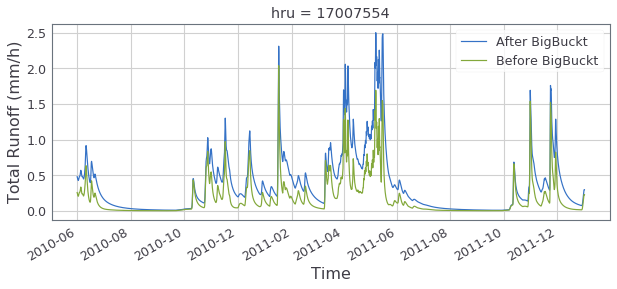

In [64]:
hid = 17007554   #HRU ID that I want to plot

plt.figure(figsize=(10,4))
(retronew.sel(hru = hid)['averageInstantRunoff']*3600*1000).loc['2010-06-01':'2011-12-31'].plot(label='After BigBuckt')
(retroold.sel(hru = hid)['averageInstantRunoff']*3600*1000).loc['2010-06-01':'2011-12-31'].plot(label='Before BigBuckt')  #m s-1 -> mm/h
plt.legend()

plt.ylabel('Total Runoff (mm/h)', fontsize=16)
plt.xlabel('Time', fontsize=16)
plt.savefig('figures/bigbucktrunoff.png', bbox_inches='tight', dpi=300)
plt.show()


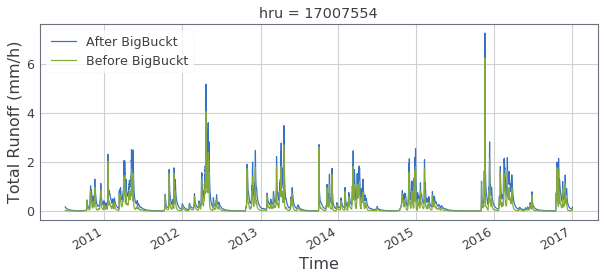

In [65]:
plt.figure(figsize=(10,4))
(retronew.sel(hru = hid)['averageInstantRunoff']*3600*1000).loc['2010-07-01':'2016-12-31'].plot(label='After BigBuckt')
(retroold.sel(hru = hid)['averageInstantRunoff']*3600*1000).loc['2010-07-01':'2016-12-31'].plot(label='Before BigBuckt')  #m s-1 -> mm/h
plt.legend()

plt.ylabel('Total Runoff (mm/h)', fontsize=16)
plt.xlabel('Time', fontsize=16)
plt.show()


## Comparing Streamflow

In [66]:
routeold = xr.open_dataset('/glade/p/work/manab/SHARP/PNW_route/output/retro_routed.nc').set_index(sSeg = 'reachID')
routenew = xr.open_dataset('/glade/p/work/manab/SHARP/PNW_route/output/aquifer_retro_routed.nc').set_index(sSeg = 'reachID')

In [67]:
o = pd.read_csv('/glade/p/work/manab/SHARP/data/dly/obsflow.dly.HHDW1.csv')
o.rename(columns = {'Year':'time', 'cfs': 'flow'}, inplace=True)

o['flow'] = o['flow']*0.028316847 #Convert to CMS
o['time'] = pd.to_datetime(o['time'])  #convert to datetime format
o.loc[o['flow'] < 0 , 'flow'] = np.nan
o.fillna(method='ffill', limit=10)

o = o.set_index(['time'])
obs = o.to_xarray()
obs

<xarray.Dataset>
Dimensions:  (time: 42807)
Coordinates:
  * time     (time) datetime64[ns] 1900-10-01T23:00:00 1900-10-02T23:00:00 ...
Data variables:
    flow     (time) float64 nan nan nan nan nan nan nan nan nan nan nan nan ...

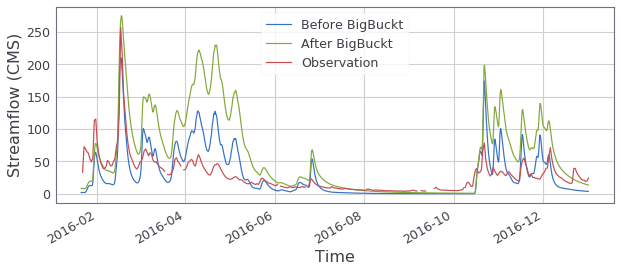

In [68]:
#USER-SUPPLIED
sid = 17003601
starttime = '2016-01-21'
endtime = '2016-12-31'

#PLOTTING
plt.figure(figsize=(10,4))
routeold.sel(sSeg = sid)['KWTroutedRunoff'].loc[starttime:endtime].plot(label='Before BigBuckt')
routenew.sel(sSeg = sid)['KWTroutedRunoff'].loc[starttime:endtime].plot(label='After BigBuckt')
(obs['flow'].loc[starttime:endtime]).plot(label='Observation')
plt.legend()
plt.ylabel('Streamflow (CMS)', fontsize=16)
plt.xlabel('Time', fontsize=16)
plt.savefig('figures/bigbucktstreamflow.png', bbox_inches='tight', dpi=300)
plt.show()